In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

In [2]:
covid = pd.read_csv("owid-covid-data.csv")
print(covid.shape)
covid.head()

(98904, 60)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


Africa           25467
Europe           23435
Asia             23426
North America    12249
South America     5943
Oceania           3742
Name: continent, dtype: int64

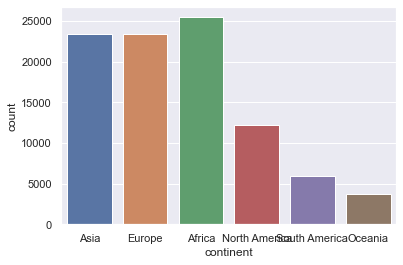

In [3]:
sns.countplot(x="continent", data=covid)
covid['continent'].value_counts()

In [4]:
vaccinations = pd.read_csv("vaccination_all_tweets.csv")
vaccinations = vaccinations.rename({'id': 'tweet_id'}, axis=1)
print(vaccinations.shape)
vaccinations.head()

(218417, 16)


,tweet_id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [5]:
sentiments = pd.read_csv("covid-19_vaccine_tweets_with_sentiment.csv")
print(sentiments.shape)
sentiments.head()

(6000, 3)


,tweet_id,label,tweet_text
0,1.360342e+18,1,"4,000 a day dying from the so called Covid-19 ..."
1,1.382896e+18,2,Pranam message for today manifested in Dhyan b...
2,1.375673e+18,2,Hyderabad-based ?@BharatBiotech? has sought fu...
3,1.381311e+18,1,"Confirmation that Chinese #vaccines ""don�t hav..."
4,1.362166e+18,3,"Lab studies suggest #Pfizer, #Moderna vaccines..."


In [6]:
all_sentiments = pd.merge(vaccinations,sentiments,on='tweet_id')
all_sentiments.head()

,tweet_id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,label,tweet_text
0,1337735595704115200,John Berry,NaN,English (not British or European) beer swillin...,2020-10-13 15:21:27,2,0,0,False,2020-12-12 12:26:34,The #FDA finally issues #EUA now comes the pro...,"['FDA', 'EUA', 'PfizerBioNTech']",Twitter Web App,0,0,False,2,The #FDA finally issues #EUA now comes the pro...
1,1338543202891161600,Hillary B-T,"Toronto, Ontario","Interested in work in #smartcities. Scientist,...",2009-03-28 02:43:31,1717,3807,7477,False,2020-12-14 17:55:43,@katejulien @TheresaLubowitz Supervising. \n\n...,NaN,Twitter for iPhone,0,1,False,2,@katejulien @TheresaLubowitz Supervising. \n\n...
2,1338469289532088320,Palli Thordarson,"Sydney, New South Wales","Professor, School of Chemistry UNSW",2014-12-05 10:10:36,19085,2518,26185,False,2020-12-14 13:02:00,Here are the lipids used in lipid nanoparticle...,"['mRNA', 'PfizerBioNTech', 'CovidVaccine']",Twitter Web App,6,42,False,2,Here are the lipids used in lipid nanoparticle...
3,1338129045087637504,Times of Oman,Oman,Oman's leading English language media house. h...,2014-03-20 04:50:33,88187,496,825,True,2020-12-13 14:30:00,Rival US companies #UPS and #FedEx are working...,"['UPS', 'FedEx', 'PfizerBioNTech', 'Covid', 'v...",TweetDeck,0,5,False,2,Rival US companies #UPS and #FedEx are working...
4,1338124603621838848,Kursad Turksen,NaN,NaN,2013-07-07 17:20:56,143,0,360,False,2020-12-13 14:12:21,#PFIZERBIONTECH #USA \nFirst shipment of Pfize...,"['PFIZERBIONTECH', 'USA']",Twitter Web App,0,0,False,2,#PFIZERBIONTECH #USA \nFirst shipment of Pfize...


<AxesSubplot:xlabel='label', ylabel='count'>

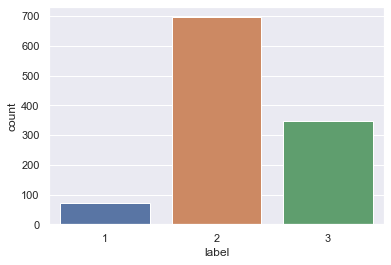

In [7]:
sns.countplot(x="label", data=all_sentiments)

user_verified,False,True,All
label,,,
1,67,6,73
2,602,94,696
3,308,39,347
All,977,139,1116


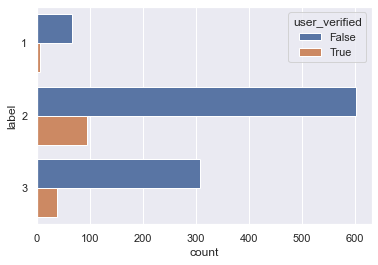

In [8]:
sns.countplot(y="label", hue="user_verified", data=all_sentiments)
my_crosstab = pd.crosstab(index=all_sentiments["label"], columns=all_sentiments["user_verified"], margins=True)
my_crosstab

(98904, 60)
(218417, 16)
(6000, 3)


user_verified,False,True,All
label,,,
1,67,6,73
2,602,94,696
3,308,39,347
All,977,139,1116


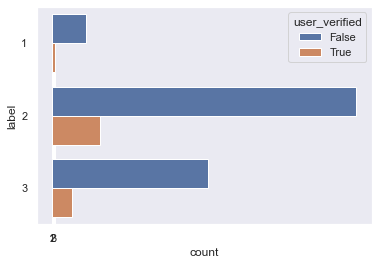

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

covid = pd.read_csv("owid-covid-data.csv")
print(covid.shape)
covid.head()

sns.countplot(x="continent", data=covid)
covid['continent'].value_counts()

vaccinations = pd.read_csv("vaccination_all_tweets.csv")
vaccinations = vaccinations.rename({'id': 'tweet_id'}, axis=1)
print(vaccinations.shape)
vaccinations.head()

sentiments = pd.read_csv("covid-19_vaccine_tweets_with_sentiment.csv")
print(sentiments.shape)
sentiments.head()

all_sentiments = pd.merge(vaccinations,sentiments,on='tweet_id')
all_sentiments.head()

sns.countplot(x="label", data=all_sentiments)

sns.countplot(y="label", hue="user_verified", data=all_sentiments)
my_crosstab = pd.crosstab(index=all_sentiments["label"], columns=all_sentiments["user_verified"], margins=True)
my_crosstab

